# Importing the necessary libraries

In [40]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for handling arrays

import os # for interacting with the operating system
from imutils import paths # To access path of images folder
from sklearn.datasets import load_files # for loading files from folders

import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

import cv2 # Open Cv library for images processing
import time # provides various time-related functions
import matplotlib.image as mpimg # Read an image from a file into an array
import random # to select random files

import keras # interface for tensorflow
import tensorflow as tf # for building deep learning models

from sklearn.model_selection import train_test_split #split dataset to train and test sets
from collections import Counter #for counting hashable objects
from keras.utils import np_utils, to_categorical # Convert to numeric values

from keras.models import Model, Sequential # to deal with sequencing of layers within a model
from keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input, LSTM # Neural Networks layers
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Activation # Neural Networks layers

from tensorflow.keras.optimizers import Adam # A famous algorithm to update weights during training
from sklearn.metrics import accuracy_score, recall_score, precision_score  # Evaluation 
from sklearn.metrics import classification_report, confusion_matrix
import pickle # to save model

# Load Dataset

In [379]:
#The path of our data 
data_dir =  r'C:\Users/Full Lung Cancer Dataset'

#Loading Data
data = load_files(data_dir)

In [380]:
 # to get the files in the specified directory
folders=os.listdir(r"C:\Users/Full Lung Cancer Dataset")

print(folders)

['Bengin cases', 'Malignant cases', 'Normal cases']


# Check Data balance

In [381]:
List = []
for i in folders: # pass over sub directories
    path = os.path.join(data_dir, i)
    count = 0
    for file in os.listdir(path): # pass over files in sub directories
        count += 1
        A=[i,count]
    List.append(A)

List # contain classes size

[['Bengin cases', 120], ['Malignant cases', 561], ['Normal cases', 416]]

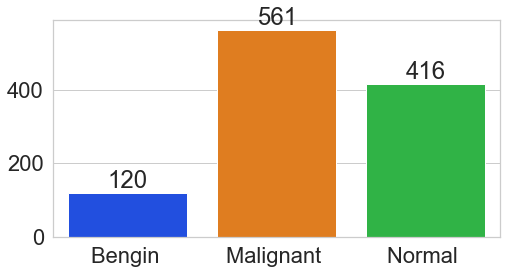

In [382]:
Classes = [item[0] for item in List]

# remove 'cases' word from classes names
Classes = [s.removesuffix("cases") for s in Classes]
Counts = [item[1] for item in List]

# plotting classes distibution
ax = sns.barplot(x= Classes,y= Counts,palette="bright") 

# customize figsize,font, and color
sns.set(rc={'figure.figsize':(8,4)},style="whitegrid", font_scale=2)  

for i in ax.containers:
    ax.bar_label(i,)

# Data Resampling & Data Preprocessing

In [383]:
data = []
List_res = []
img_size = 256

for i in folders:
    path = os.path.join(data_dir, i) # Go over each folder path
    class_num = folders.index(i) 
    files = os.listdir(path) # Get filenames in current folder
    files = random.sample(files, 120) # Pick 120 random files
    count = 0
    for file in files:
        filepath = os.path.join(path, file)
        count += 1
        B=[i,count]
        
        # Read images
        img = cv2.imread(filepath, 0) 
        
        # # resize image
        img = cv2.resize(img, (img_size, img_size)) 
        
        data.append([img, class_num])
    List_res.append(B)

random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)

print('X length:', len(X))
print('y counts:', Counter(y))

# normalize the images
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = np.array(y)
List_res

X length: 360
y counts: Counter({2: 120, 1: 120, 0: 120})


[['Bengin cases', 120], ['Malignant cases', 120], ['Normal cases', 120]]

# Plot Class Distribution After Resampling

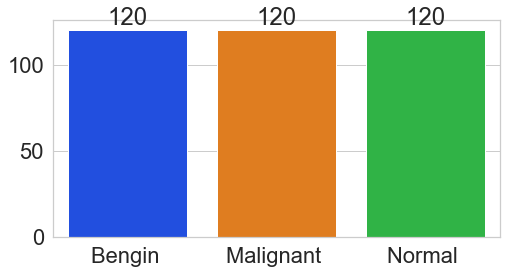

In [384]:
Classes_res = [item[0] for item in List_res]
Classes_res = [s.removesuffix("cases") for s in Classes]
Counts_res = [item[1] for item in List_res]

ax = sns.barplot(x= Classes_res,y= Counts_res,palette="bright") # plotting classes distibution

sns.set(rc={'figure.figsize':(8,4)},style="whitegrid", font_scale=2) # customize figsize,font, and color

for i in ax.containers:
    ax.bar_label(i,)

In [385]:
# 75% for training and 25% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_test), X_test.shape)

270 (270, 256, 256, 1)
90 (90, 256, 256, 1)


In [386]:
print(Counter(y_train), Counter(y_test))

Counter({0: 90, 2: 90, 1: 90}) Counter({1: 30, 0: 30, 2: 30})


# Encoding the categorical target [Classes names]

In [387]:
# Change the labels from categorical to integer
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label: ', y_train[10])
print('After conversion to categorical ( one-hot ) : ', y_train_encoded[10])

Original label 6 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1.]


# Building Model1: DNN

In [388]:
model1 = Sequential([
    Input(shape=X_train.shape[1:]),
    #Downsamples the input
    AveragePooling2D(pool_size=2, strides=None), 
    # convert to one dimension
    Flatten(), 
    # receives input from all the neurons of the previous layer
    Dense(2048, activation='relu'), 
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model1.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['acc'])

# Model1 Training

In [237]:
start = time.time()

Training = model1.fit(X_train, y_train_encoded, batch_size=8, epochs=100, validation_data=(X_test, y_test_encoded))

end = time.time()

duration = end - start

Epoch 1/100
34/34 [==============================] - 100s 2s/step - loss: 1.1176 - acc: 0.3889 - val_loss: 1.0311 - val_acc: 0.5778
Epoch 2/100
34/34 [==============================] - 46s 1s/step - loss: 0.9368 - acc: 0.5444 - val_loss: 0.8712 - val_acc: 0.4889
Epoch 3/100
34/34 [==============================] - 46s 1s/step - loss: 0.8184 - acc: 0.5926 - val_loss: 0.6337 - val_acc: 0.7111
Epoch 4/100
34/34 [==============================] - 46s 1s/step - loss: 0.6633 - acc: 0.7111 - val_loss: 0.7095 - val_acc: 0.6556
Epoch 5/100
34/34 [==============================] - 47s 1s/step - loss: 0.5891 - acc: 0.7074 - val_loss: 0.4407 - val_acc: 0.8222
Epoch 6/100
34/34 [==============================] - 46s 1s/step - loss: 0.4516 - acc: 0.7852 - val_loss: 0.4398 - val_acc: 0.7889
Epoch 7/100
34/34 [==============================] - 45s 1s/step - loss: 0.3712 - acc: 0.8444 - val_loss: 0.3021 - val_acc: 0.9000
Epoch 8/100
34/34 [==============================] - 45s 1s/step - loss: 0.2886 - 

# Model1 Evaluation

**1- Classification Report:**


In [342]:
y_pred = model1.predict(X_test, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

print("Training Time:", round(duration,2))

3/3 [==============================] - 5s 350ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       0.97      0.97      0.97        30
           2       1.00      0.90      0.95        30

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90

Training Time: 4648.12


**2- Confusion Matrix:**

3/3 [==============================] - 3s 407ms/step


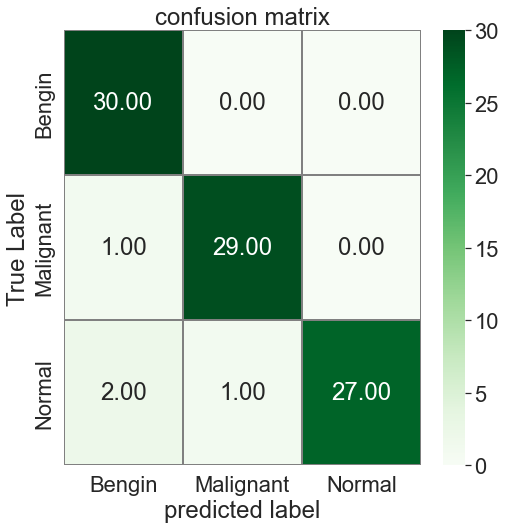

In [343]:
classes=['Bengin','Malignant','Normal']

Y_pred = model1.predict(X_test)
confusion_mtx = confusion_matrix(y_true=y_test, y_pred=y_pred_bool)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax,xticklabels= classes, yticklabels= classes
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

**3- Ploting DNN Model accuracy (How the model is training over epoches)**

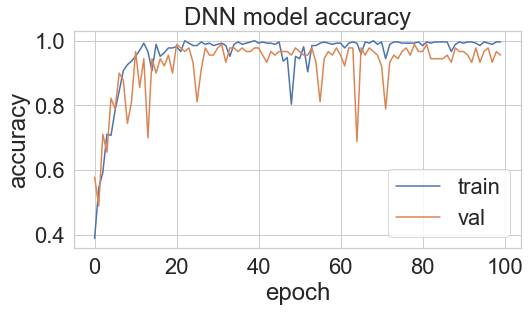

In [371]:
history = Training
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('DNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Building Model2 - LSTM

In [264]:
time_steps= img_size # timesteps to unroll
n_units=256 # hidden LSTM units
n_inputs=img_size # rows of 256 pixels (img is 256x256)
n_classes=3 # dataset classes/labels (0-2)
batch_size=128 # Size of each batch

model2 = Sequential()
model2.add(LSTM(n_units, input_shape=(time_steps, n_inputs)))
model2.add(Dense(n_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['acc'])

# Model2 Training 

In [265]:
X_train = [x.reshape((-1, time_steps, n_inputs)) for x in X_train]

X_train = np.array(X_train).reshape((-1, time_steps, n_inputs))

start2 = time.time()

history2 = model2.fit(X_train, y_train_encoded,batch_size=batch_size, epochs= 100, shuffle=False, validation_data=(X_test, y_test_encoded))
end2 = time.time()

duration2 = end2 - start2

Epoch 1/100
3/3 [==============================] - 30s 8s/step - loss: 1.0863 - acc: 0.3259 - val_loss: 1.1004 - val_acc: 0.3222
Epoch 2/100
3/3 [==============================] - 18s 5s/step - loss: 1.0768 - acc: 0.4037 - val_loss: 1.1033 - val_acc: 0.3444
Epoch 3/100
3/3 [==============================] - 19s 6s/step - loss: 1.0740 - acc: 0.4074 - val_loss: 1.1055 - val_acc: 0.3444
Epoch 4/100
3/3 [==============================] - 19s 6s/step - loss: 1.0714 - acc: 0.4074 - val_loss: 1.1031 - val_acc: 0.3444
Epoch 5/100
3/3 [==============================] - 19s 6s/step - loss: 1.0661 - acc: 0.4074 - val_loss: 1.0964 - val_acc: 0.3444
Epoch 6/100
3/3 [==============================] - 19s 6s/step - loss: 1.0590 - acc: 0.4074 - val_loss: 1.0882 - val_acc: 0.3556
Epoch 7/100
3/3 [==============================] - 19s 6s/step - loss: 1.0522 - acc: 0.4037 - val_loss: 1.0807 - val_acc: 0.3778
Epoch 8/100
3/3 [==============================] - 19s 6s/step - loss: 1.0465 - acc: 0.4037 - val

3/3 [==============================] - 19s 6s/step - loss: 0.3570 - acc: 0.8444 - val_loss: 0.5521 - val_acc: 0.7667
Epoch 65/100
3/3 [==============================] - 19s 6s/step - loss: 0.3260 - acc: 0.8519 - val_loss: 0.5417 - val_acc: 0.7556
Epoch 66/100
3/3 [==============================] - 19s 6s/step - loss: 0.3134 - acc: 0.8630 - val_loss: 0.5202 - val_acc: 0.8000
Epoch 67/100
3/3 [==============================] - 19s 6s/step - loss: 0.2818 - acc: 0.8815 - val_loss: 0.5075 - val_acc: 0.8111
Epoch 68/100
3/3 [==============================] - 19s 6s/step - loss: 0.2557 - acc: 0.9074 - val_loss: 0.5233 - val_acc: 0.8000
Epoch 69/100
3/3 [==============================] - 19s 6s/step - loss: 0.2448 - acc: 0.9222 - val_loss: 0.5076 - val_acc: 0.8444
Epoch 70/100
3/3 [==============================] - 19s 6s/step - loss: 0.2296 - acc: 0.9222 - val_loss: 0.4741 - val_acc: 0.8444
Epoch 71/100
3/3 [==============================] - 19s 6s/step - loss: 0.2120 - acc: 0.9296 - val_loss

# Model2 Evaluation

**1- Classification Report:**

In [427]:
y_pred = model2.predict(X_test, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

print("Training Time:", round(duration2,2))

3/3 [==============================] - 3s 938ms/step
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        30
           1       1.00      0.77      0.87        30
           2       0.77      0.67      0.71        30

    accuracy                           0.81        90
   macro avg       0.83      0.81      0.81        90
weighted avg       0.83      0.81      0.81        90

Training Time: 1910.55


**3- Ploting LSTM Model accuracy (How the model is training over epoches):**

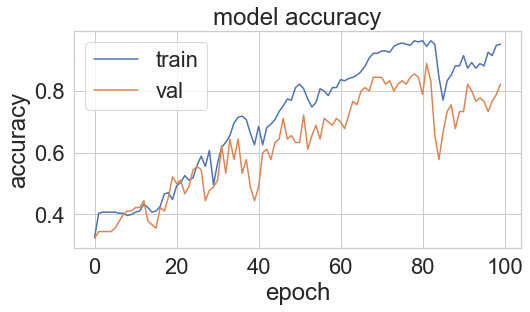

In [363]:
history = history2
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Building Model3 - CNN

In [268]:
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), input_shape= (256,256,1)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(16))
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      640       
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 246016)           

# Model3 training

In [270]:
model3.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['acc'])

start3 = time.time()

history3 = model3.fit(X_train, y_train_encoded, batch_size=8, epochs=100, validation_data=(X_test, y_test_encoded))

end3 = time.time()

duration3 = end3 - start3

Epoch 1/100
34/34 [==============================] - 144s 3s/step - loss: 1.2413 - acc: 0.4000 - val_loss: 0.7956 - val_acc: 0.6000
Epoch 2/100
34/34 [==============================] - 97s 3s/step - loss: 0.6606 - acc: 0.7556 - val_loss: 0.5652 - val_acc: 0.8667
Epoch 3/100
34/34 [==============================] - 92s 3s/step - loss: 0.3622 - acc: 0.9185 - val_loss: 0.3292 - val_acc: 0.9222
Epoch 4/100
34/34 [==============================] - 93s 3s/step - loss: 0.1713 - acc: 0.9741 - val_loss: 0.1875 - val_acc: 0.9667
Epoch 5/100
34/34 [==============================] - 95s 3s/step - loss: 0.0842 - acc: 0.9889 - val_loss: 0.1445 - val_acc: 0.9667
Epoch 6/100
34/34 [==============================] - 94s 3s/step - loss: 0.0554 - acc: 0.9926 - val_loss: 0.1787 - val_acc: 0.9000
Epoch 7/100
34/34 [==============================] - 95s 3s/step - loss: 0.0562 - acc: 0.9926 - val_loss: 0.1064 - val_acc: 0.9667
Epoch 8/100
34/34 [==============================] - 96s 3s/step - loss: 0.0262 - 

# Model3 Evaluation

**1- Classification Report:**

In [271]:
y_pred = model3.predict(X_test, verbose=1)

y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

print(confusion_matrix(y_true=y_test, y_pred=y_pred_bool))
print("Training Time:", round(duration3,2))

3/3 [==============================] - 16s 3s/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       1.00      0.97      0.98        30
           2       0.97      1.00      0.98        30

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90

[[29  0  1]
 [ 1 29  0]
 [ 0  0 30]]
Training Time: 9656.78


**2- Confusion Matrix:**

3/3 [==============================] - 71s 9s/step


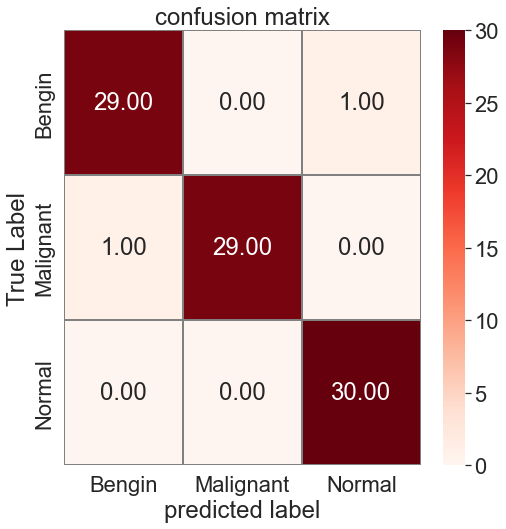

In [338]:
classes=['Bengin','Malignant','Normal']
Y_pred = model3.predict(X_test)
confusion_mtx = confusion_matrix(y_true=y_test, y_pred=y_pred_bool)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax,xticklabels= classes, yticklabels= classes
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

**3- Ploting CNN Model accuracy (How the model is training over epoches):**

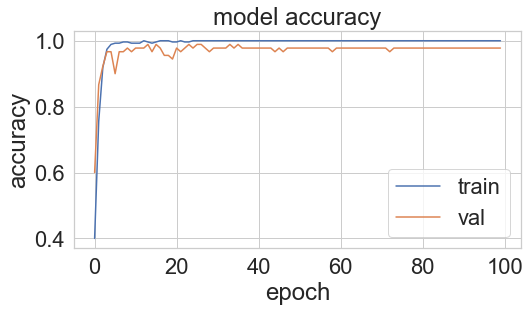

In [397]:
history = history3
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Save The best Model

In [278]:
%%capture # To hide undesirable output

S = pickle.dumps(model3) # Save model
CNN_Model = pickle.loads(S) # Load model

# Prediction Function

In [395]:
def Predict(path):
    img_size = 256 
    
    #Read the image from the path
    img = cv2.imread(path, 0)  
    
    #Resize the length and width of the image to be 256
    img = cv2.resize(img, (img_size, img_size))
    
    #Convert to numpy array
    img = np.array(img).reshape(-1, img_size, img_size, 1)
    
    #Scale the image array
    img = img / 255.0
    
    #Predict the result using the model
    result = CNN_Model.predict(img)
    
    #Select the max value in the result list
    pred_idx = np.argmax(result)
    
    #Match numeric result to categorical class
    prediction =classes[pred_idx]
    
    #Get the probability of the resulted class
    proba = round(np.amax(result),3)
    
    print("The result of prediction is", prediction, "With probability", proba,"%")

1/1 [==============================] - 0s 172ms/step
The result of prediction is Bengin With probability 1.0 %


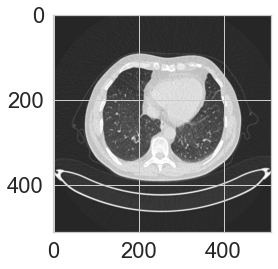

In [335]:
path = r"C:\Users/Is Bengin.jpg"

img=mpimg.imread(path)       # Read the image
imgplot = plt.imshow(img)    # Show the image

Predict(path) # Predict the result

1/1 [==============================] - 0s 188ms/step
The result of prediction is Normal With probability 0.986 %


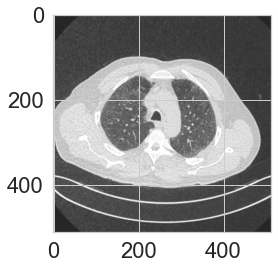

In [336]:
path = r"C:\Users/Is Normal.jpg"

img=mpimg.imread(path)      # Read the image
imgplot = plt.imshow(img)   # Show the image

Predict(path)  # Predict the result

1/1 [==============================] - 0s 210ms/step
The result of prediction is Malignant With probability 1.0 %


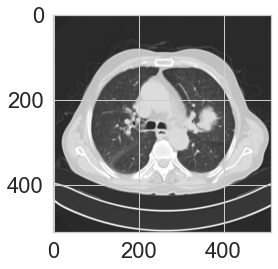

In [337]:
path = r"C:\Users/Is Malignant.jpg"

img=mpimg.imread(path)       # Read the image
imgplot = plt.imshow(img)    # Show the image
 
Predict(path)  # Predict the result

# Comparison Results Summary

In [12]:
A = pd.DataFrame([['DNN Model',0.96, 4648.12]]) # Convert list to dataframe
B = pd.DataFrame([['LSTM Model',0.81,1910.55]])
C = pd.DataFrame([['CNN Model',0.98,9656.78]])

frames = [A,B,C]

Res_Com = pd.concat(frames,ignore_index = True) 

Res_Com.columns =['Model','Test Accuracy','Training Time in seconds'] # put names for columns

Res_Com

,Model,Test Accuracy,Training Time in seconds
0,DNN Model,0.96,4648.12
1,LSTM Model,0.81,1910.55
2,CNN Model,0.98,9656.78


**Insight:
    CNN model is the best model with 98% accuracy.**